In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import GRB
import os
from itertools import product
from functions import (load_parameters, load_generation_data, load_price_data, generate_randomized_generation,
generate_rt_scenarios, plot_generation_data, plot_randomized_generation, plot_scenarios_for_generator, plot_rt_scenarios, plot_summary)

generation_data, I, T = load_generation_data(date_filter="2022-07-18")
S, R, P_RT, K, K0, M1, M2 = load_parameters(I, T, generation_data)
P_DA, P_PN = load_price_data()

✅ 총 3개 파일을 불러왔습니다: 1201.csv, 401.csv, 89.csv
📊 데이터 Shape: I=3, T=24, S=20
✅ 시뮬레이션 초기화 완료: S=20, Randomness='high', M1=768.00, M2=1202.00


In [ ]:
# only = gp.Model("only")
# only.setParam("MIPGap", 1e-7)

# x = only.addVars(I, T, vtype=GRB.CONTINUOUS, lb=0, name="x")
# yp = only.addVars(I, T, S, vtype=GRB.CONTINUOUS, lb=0, name="y_plus")
# ym = only.addVars(I, T, S, vtype=GRB.CONTINUOUS, lb=0, name="y_minus")
# z = only.addVars(I, T+1, S, vtype=GRB.CONTINUOUS, name="z")
# zc = only.addVars(I, T, S, vtype=GRB.CONTINUOUS, name="z_charge")
# zd = only.addVars(I, T, S, vtype=GRB.CONTINUOUS, name="z_discharge")
# zeta = only.addVars(I, T, S, vtype=GRB.BINARY, name="zeta")
# delta = only.addVars(I, T, S, vtype=GRB.BINARY, name="delta")
# rho = only.addVars(I, T, S, vtype=GRB.BINARY, name="rho")

# only.update()

# obj = gp.quicksum(P_DA[t] * x[i, t] for i, t in product(range(I), range(T))) \
#     + gp.quicksum(1 / S * (P_RT[t, s] * yp[i, t, s] - P_PN[t] * ym[i, t, s]) for i, t, s in product(range(I), range(T), range(S)))

# only.setObjective(obj, GRB.MAXIMIZE)

# for i, t, s in product(range(I), range(T), range(S)):
#     only.addConstr(R[i, t, s] - x[i, t] == yp[i, t, s] - ym[i, t, s] + zc[i, t, s] - zd[i, t, s])
#     only.addConstr(yp[i, t, s] <= R[i, t, s])
#     only.addConstr(z[i, t + 1, s] == z[i, t, s] + zc[i, t, s] - zd[i, t, s])
#     only.addConstr(zd[i, t, s] <= z[i, t, s])
#     only.addConstr(zc[i, t, s] <= K[i] - z[i, t, s])
#     only.addConstr(yp[i, t, s] <= M1 * rho[i, t, s])
#     only.addConstr(ym[i, t, s] <= M1 * (1 - rho[i, t, s]))
#     only.addConstr(ym[i, t, s] <= M1 * delta[i, t, s])
#     only.addConstr(zc[i, t, s] <= M1 * (1 - delta[i, t, s]))
#     only.addConstr(zc[i, t, s] <= M1 * zeta[i, t, s])
#     only.addConstr(zd[i, t, s] <= M1 * (1 - zeta[i, t, s]))
# for i, s in product(range(I), range(S)):
#     only.addConstr(z[i, 0, s] == K0[i])

# only.optimize()

# if only.status == GRB.OPTIMAL:
#     print(f"Optimal solution found! Objective value: {only.objVal}")
# else:
#     print("No optimal solution found.")

# x_vals = np.array([[x[i, t].X for t in range(T)] for i in range(I)])
# yp_vals = np.array([[[yp[i, t, s].X for s in range(S)] for t in range(T)] for i in range(I)]) 
# ym_vals = np.array([[[ym[i, t, s].X for s in range(S)] for t in range(T)] for i in range(I)])
# z_vals  = np.array([[[z[i, t, s].X for s in range(S)] for t in range(T)] for i in range(I)])
# zc_vals = np.array([[[zc[i, t, s].X for s in range(S)] for t in range(T)] for i in range(I)])
# zd_vals = np.array([[[zd[i, t, s].X for s in range(S)] for t in range(T)] for i in range(I)])

Set parameter MIPGap to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.4.0 24E263)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
MIPGap  1e-07

Optimize a model with 15900 rows, 11652 columns and 37500 nonzeros
Model fingerprint: 0xb7fce8ba
Variable types: 7332 continuous, 4320 integer (4320 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+02]
  Objective range  [2e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+02]
Presolve removed 11570 rows and 8178 columns
Presolve time: 0.34s
Presolved: 4330 rows, 3474 columns, 10951 nonzeros
Variable types: 2189 continuous, 1285 integer (1285 binary)
Found heuristic solution: objective 645480.09041
Found heuristic solution: objective 667269.70564

Root relaxation: objective 7.973736e+05, 1856 iterations, 0.02 seconds (0.03 work units)

    Nodes    |    Current Node    |     Objective Bounds   

In [43]:
# da_profit = sum(P_DA[t] * x[i, t].X for i in range(I) for t in range(T))
# rt_profit = sum(P_RT[t, s] * yp[i, t, s].X / S for i in range(I) for t in range(T) for s in range(S))
# pn_cost   = sum(P_PN[t] * ym[i, t, s].X / S for i in range(I) for t in range(T) for s in range(S))
# total_profit = da_profit + rt_profit - pn_cost

# print("[DISAGGREGATION MODEL]")
# print(f"DA Profit      = {da_profit:.2f}")
# print(f"RT Profit      = {rt_profit:.2f}")
# print(f"Penalty Cost   = {pn_cost:.2f}")
# print(f"Total Profit   = {total_profit:.2f}")

[DISAGGREGATION MODEL]
DA Profit      = 228008.31
RT Profit      = 576306.14
Penalty Cost   = 7767.91
Total Profit   = 796546.54



[ONLY MODEL] Day-Ahead Commitment (sum over DERs):
TOTAL: 1469.00


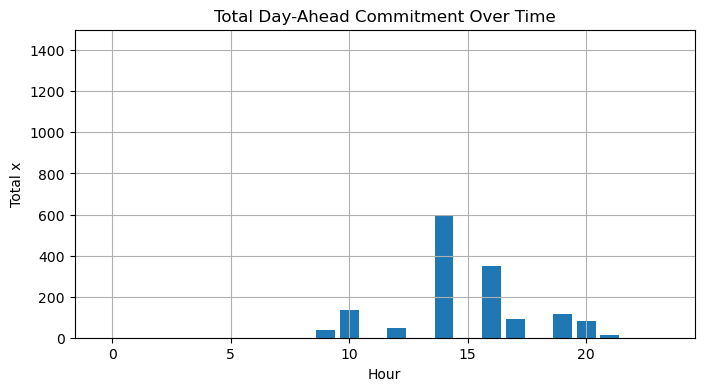

In [44]:
# print("\n[ONLY MODEL] Day-Ahead Commitment (sum over DERs):")
# total_only_commit = 0
# for t in range(T):
#     commit_t = sum(x[i, t].X for i in range(I))
#     total_only_commit += commit_t
#     # print(f"Time {t}: {commit_t:.2f}")
# print(f"TOTAL: {total_only_commit:.2f}")

# plt.figure(figsize=(8, 4))
# plt.bar(range(T), x_vals.sum(axis=0))
# plt.title("Total Day-Ahead Commitment Over Time")
# plt.xlabel("Hour")
# plt.ylabel("Total x")
# plt.ylim(0,1500)
# plt.grid(True)
# plt.show()

In [45]:
# for t in range(19,20):
#     for i in range(I):
#         for s in range(0,2):
#             R_val  = R[i, t, s]
#             x_val  = x_vals[i, t]
#             yp_val = yp_vals[i, t, s]
#             ym_val = ym_vals[i, t, s]
#             zc_val = zc_vals[i, t, s]
#             zd_val = zd_vals[i, t, s]

#             lhs = R_val - x_val
#             rhs = yp_val - ym_val + zc_val - zd_val

#             print(f"[i={i}, t={t:02d}, s={s:02d}]  R={R_val:.2f}, x={x_val:.2f}, y⁺={yp_val:.2f}, y⁻={ym_val:.2f}, zᶜ={zc_val:.2f}, zᴰ={zd_val:.2f}")
#             # print(f"                 LHS = {lhs:.2f}, RHS = {rhs:.2f}")

[i=0, t=19, s=00]  R=51.00, x=33.00, y⁺=18.00, y⁻=0.00, zᶜ=0.00, zᴰ=0.00
[i=0, t=19, s=01]  R=63.00, x=33.00, y⁺=0.00, y⁻=0.00, zᶜ=30.00, zᴰ=0.00
[i=1, t=19, s=00]  R=41.00, x=38.00, y⁺=0.00, y⁻=0.00, zᶜ=3.00, zᴰ=0.00
[i=1, t=19, s=01]  R=36.00, x=38.00, y⁺=0.00, y⁻=0.00, zᶜ=0.00, zᴰ=2.00
[i=2, t=19, s=00]  R=53.00, x=43.00, y⁺=7.00, y⁻=0.00, zᶜ=3.00, zᴰ=0.00
[i=2, t=19, s=01]  R=53.00, x=43.00, y⁺=0.00, y⁻=0.00, zᶜ=10.00, zᴰ=0.00


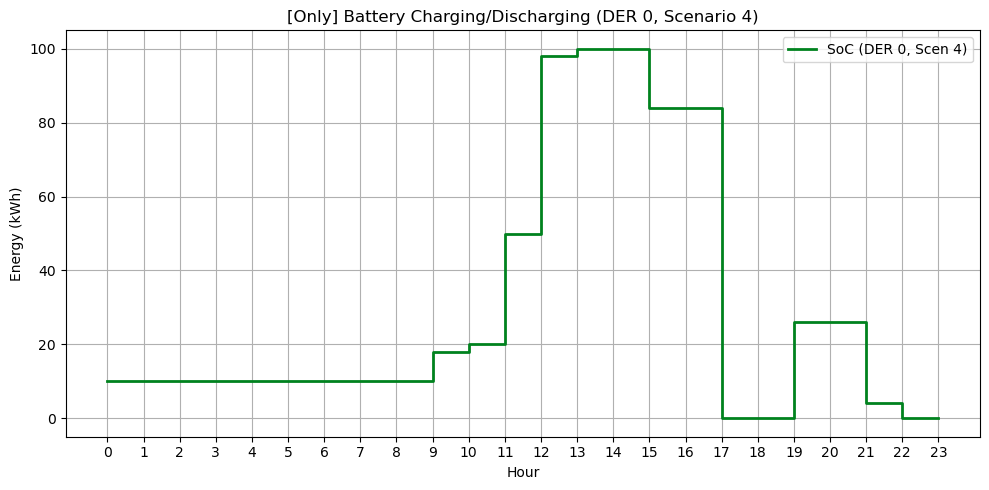

In [46]:
# i=0
# s=4
# zc_single = zc_vals[i, :, s]  
# zd_single = zd_vals[i, :, s]
# z_single = z_vals[i, :, s]
# hours = np.arange(len(zc_single))

# plt.figure(figsize=(10, 5))
# # plt.step(hours, zc_single, where='post', label=f"Charge (DER {i}, Scen {s})", color = 'green', linestyle = "--", linewidth = 1.5)
# # plt.step(hours, zd_single, where='post', label=f"Discharge (DER {i}, Scen {s})", linestyle = "--", color = 'red')
# plt.step(hours, z_single, where='post', label=f"SoC (DER {i}, Scen {s})", color='#00821E', linewidth=2)
# plt.title(f"[Only] Battery Charging/Discharging (DER {i}, Scenario {s})")
# plt.xlabel("Hour")
# plt.ylabel("Energy (kWh)")
# plt.xticks(hours)
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [178]:
R_forecast = np.mean(R, axis=2) * 0.9

m = gp.Model("DA_RT_Storage")
m.setParam("MIPGap", 1e-7)

# ---------------변수설정----------------
x = m.addVars(I, T, name="x", lb=0)
zc_DA = m.addVars(I, T, name="zc_DA", lb=0)
zd_DA = m.addVars(I, T, name="zd_DA", lb=0)
mu = m.addVars(I, T, vtype=GRB.BINARY, name="mu")

yp = m.addVars(I, T, S, name="y_plus", lb=0)
ym = m.addVars(I, T, S, name="y_minus", lb=0)
z = m.addVars(I, T+1, S, name="z_RT", lb=0)
zc_RT = m.addVars(I, T, S, name="zc_RT", lb=0)
zd_RT = m.addVars(I, T, S, name="zd_RT", lb=0)
rho = m.addVars(I, T, S, vtype=GRB.BINARY, name="rho")
delta = m.addVars(I, T, S, vtype=GRB.BINARY, name="delta")
zeta = m.addVars(I, T, S, vtype=GRB.BINARY, name="zeta")

# --------------목적함수----------------
m.setObjective(sum(P_DA[t] * x[i, t] for i, t in product(range(I), range(T))) +
    sum((1 / S) * (P_RT[t, s] * yp[i, t, s] - P_PN[t] * ym[i, t, s]) for i, t, s in product(range(I), range(T), range(S))), GRB.MAXIMIZE)

# ---------------제약식-----------------
for i, t in product(range(I), range(T)):
    m.addConstr(x[i, t] - zd_DA[i, t] + zc_DA[i, t] == R_forecast[i, t])
    m.addConstr(zc_DA[i, t] <= M1 * mu[i, t])
    m.addConstr(zd_DA[i, t] <= M1 * (1 - mu[i, t]))

for i, t, s in product(range(I), range(T), range(S)):
    m.addConstr(zc_DA[i, t] <= K[i] - z[i, t, s])
    m.addConstr(zd_DA[i, t] <= z[i, t, s])
    m.addConstr(R[i, t, s] - x[i, t] == yp[i, t, s] - ym[i, t, s] + zc_RT[i, t, s] - zd_RT[i, t, s] + zc_DA[i, t] - zd_DA[i, t])
    m.addConstr(yp[i, t, s] <= R[i, t, s])
    m.addConstr(zd_RT[i, t, s] <= z[i, t, s] + zc_DA[i, t] - zd_DA[i, t])
    m.addConstr(zc_RT[i, t, s] <= K[i] - z[i, t, s] - zc_DA[i, t] + zd_DA[i, t])
    m.addConstr(z[i, t, s] <= K[i])
    m.addConstr(z[i, t + 1, s] == z[i, t, s] + zc_DA[i, t] - zd_DA[i, t] + zc_RT[i, t, s] - zd_RT[i, t, s])
    m.addConstr(yp[i, t, s] <= M1 * rho[i, t, s])
    m.addConstr(ym[i, t, s] <= M1 * (1 - rho[i, t, s]))
    m.addConstr(ym[i, t, s] <= M1 * delta[i, t, s])
    m.addConstr(zc_RT[i, t, s] <= M1 * (1 - delta[i, t, s]))
    m.addConstr(zc_RT[i, t, s] <= M1 * zeta[i, t, s])
    m.addConstr(zd_RT[i, t, s] <= M1 * (1 - zeta[i, t, s]))
for i, s in product(range(I), range(S)):
    m.addConstr(z[i, 0, s] == K0[i])
    
m.optimize()

x_vals      = np.array([[x[i, t].X for t in range(T)] for i in range(I)])
zc_DA_vals  = np.array([[zc_DA[i, t].X for t in range(T)] for i in range(I)])
zd_DA_vals  = np.array([[zd_DA[i, t].X for t in range(T)] for i in range(I)])

yp_vals     = np.array([[[yp[i, t, s].X for s in range(S)] for t in range(T)] for i in range(I)])
ym_vals     = np.array([[[ym[i, t, s].X for s in range(S)] for t in range(T)] for i in range(I)])
z_vals   = np.array([[[z[i, t, s].X for s in range(S)] for t in range(T + 1)] for i in range(I)])
zc_RT_vals  = np.array([[[zc_RT[i, t, s].X for s in range(S)] for t in range(T)] for i in range(I)])
zd_RT_vals  = np.array([[[zd_RT[i, t, s].X for s in range(S)] for t in range(T)] for i in range(I)])

Set parameter MIPGap to value 1e-07
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.4.0 24E263)

CPU model: Apple M3
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
MIPGap  1e-07

Optimize a model with 20436 rows, 11868 columns and 56724 nonzeros
Model fingerprint: 0xd792239d
Variable types: 7476 continuous, 4392 integer (4392 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+02]
  Objective range  [2e+00, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-01, 8e+02]
Presolve removed 18433 rows and 10488 columns
Presolve time: 0.10s
Presolved: 2003 rows, 1380 columns, 6070 nonzeros
Variable types: 1055 continuous, 325 integer (325 binary)
Found heuristic solution: objective 690644.81247

Root relaxation: objective 7.173472e+05, 1081 iterations, 0.01 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | I

In [179]:
da_profit = sum(P_DA[t] * x[i, t].X for i in range(I) for t in range(T))
rt_profit = sum(P_RT[t, s] * yp[i, t, s].X / S for i in range(I) for t in range(T) for s in range(S))
pn_cost   = sum(P_PN[t] * ym[i, t, s].X / S for i in range(I) for t in range(T) for s in range(S))
total_profit = da_profit + rt_profit - pn_cost

print("[DISAGGREGATION MODEL]")
print(f"DA Profit      = {da_profit:.2f}")
print(f"RT Profit      = {rt_profit:.2f}")
print(f"Penalty Cost   = {pn_cost:.2f}")
print(f"Total Profit   = {total_profit:.2f}")

[DISAGGREGATION MODEL]
DA Profit      = 354241.54
RT Profit      = 390800.08
Penalty Cost   = 27694.37
Total Profit   = 717347.25


TOTAL: 2376.07


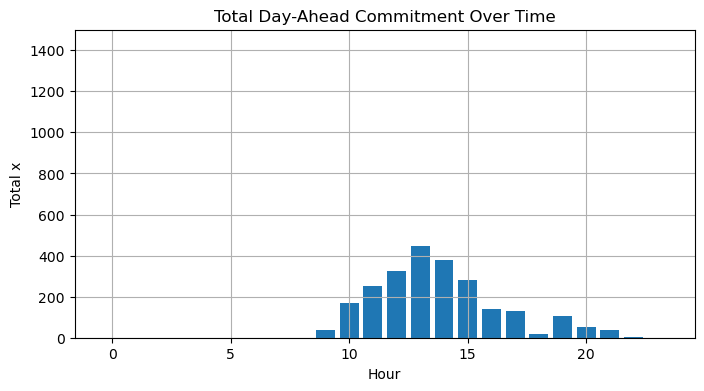

In [180]:
total_only_commit = 0
for t in range(T):
    commit_t = sum(x[i, t].X for i in range(I))
    total_only_commit += commit_t
    # print(f"Time {t}: {commit_t:.2f}")
print(f"TOTAL: {total_only_commit:.2f}")

plt.figure(figsize=(8, 4))
plt.bar(range(T), x_vals.sum(axis=0))
plt.title("Total Day-Ahead Commitment Over Time")
plt.xlabel("Hour")
plt.ylabel("Total x")
plt.ylim(0,1500)
plt.grid(True)
plt.show()

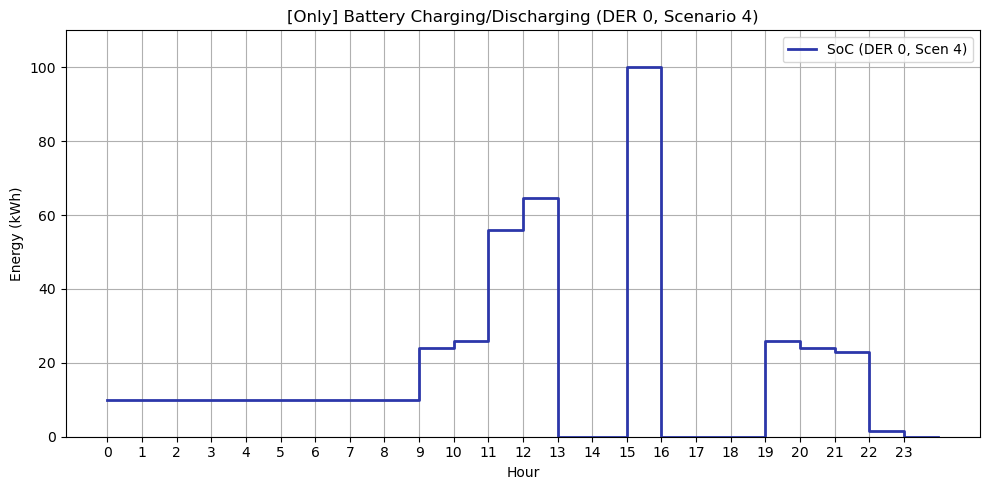

In [181]:
i=0
s=4
z_single = z_vals[i, :, s]
zc_RT_single = zc_RT_vals[i, :, s]
zc_DA_single = zc_DA_vals[i, :]
zd_RT_single = zd_RT_vals[i, :, s]
zd_DA_single = zd_DA_vals[i, :]
hours = np.arange(len(zd_RT_single))
hours_z = np.arange(len(z_single))

plt.figure(figsize=(10, 5))
# plt.step(hours, zd_RT_single + zd_DA_single, where='post', label=f"SoC (DER {i}, Scen {s})", color='#C4143D', linewidth=2)
# plt.step(hours, zc_RT_single + zc_DA_single, where='post', label=f"SoC (DER {i}, Scen {s})", color='#00601D', linewidth=2)
plt.step(hours_z, z_single, where='post', label=f"SoC (DER {i}, Scen {s})", color='#2C37AA', linewidth=2)
plt.title(f"[Only] Battery Charging/Discharging (DER {i}, Scenario {s})")
plt.xlabel("Hour")
plt.ylabel("Energy (kWh)")
plt.xticks(hours)
plt.ylim(0, 110)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [185]:
for s in range(0,2):
    print(f"\n===== Scenario {s} =====")
    for t in range(T):
        for i in range(0,1):
            R_val      = R[i, t, s]
            x_val      = x_vals[i, t]
            zc_DA_val  = zc_DA_vals[i, t]
            zd_DA_val  = zd_DA_vals[i, t]
            yp_val     = yp_vals[i, t, s]
            ym_val     = ym_vals[i, t, s]
            zc_RT_val  = zc_RT_vals[i, t, s]
            zd_RT_val  = zd_RT_vals[i, t, s]
            z_val = z_vals[i, t, s]

            print(f"(s={s}, t={t}, i={i})")
            print(f"  Rf     = {R_forecast[i, t]:.3f}")
            print(f"  x      = {x_val:.3f}")
            print(f"  zc_DA  = {zc_DA_val:.3f}")
            print(f"  zd_DA  = {zd_DA_val:.3f}")
            print(f"  R      = {R_val:.3f}")
            print(f"  yp     = {yp_val:.3f}")
            print(f"  ym     = {ym_val:.3f}")
            print(f"  zc_RT  = {zc_RT_val:.3f}")
            print(f"  zd_RT  = {zd_RT_val:.3f}")
            print(f"  z      = {z_val:.3f}")
            print("-" * 40)


===== Scenario 0 =====
(s=0, t=0, i=0)
  Rf     = 0.000
  x      = 0.000
  zc_DA  = 0.000
  zd_DA  = 0.000
  R      = 0.000
  yp     = 0.000
  ym     = 0.000
  zc_RT  = 0.000
  zd_RT  = 0.000
  z      = 10.000
----------------------------------------
(s=0, t=1, i=0)
  Rf     = 0.000
  x      = 0.000
  zc_DA  = 0.000
  zd_DA  = 0.000
  R      = 0.000
  yp     = 0.000
  ym     = 0.000
  zc_RT  = 0.000
  zd_RT  = 0.000
  z      = 10.000
----------------------------------------
(s=0, t=2, i=0)
  Rf     = 0.000
  x      = 0.000
  zc_DA  = 0.000
  zd_DA  = 0.000
  R      = 0.000
  yp     = 0.000
  ym     = 0.000
  zc_RT  = 0.000
  zd_RT  = 0.000
  z      = 10.000
----------------------------------------
(s=0, t=3, i=0)
  Rf     = 0.000
  x      = 0.000
  zc_DA  = 0.000
  zd_DA  = 0.000
  R      = 0.000
  yp     = 0.000
  ym     = 0.000
  zc_RT  = 0.000
  zd_RT  = 0.000
  z      = 10.000
----------------------------------------
(s=0, t=4, i=0)
  Rf     = 0.000
  x      = 0.000
  zc_DA  = 0.0